<a href="https://colab.research.google.com/github/visiont3lab/machine_learning/blob/master/13-ClassificationEmotions/clf_teachable_machine/classification_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We have used [teachable machine](https://teachablemachine.withgoogle.com) to create a dataset.

In [0]:
from google.colab import files
uploaded = files.upload()


Saving Dataset.zip to Dataset.zip


In [0]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import pickle
from IPython.display import clear_output
import matplotlib.pyplot as plt
import matplotlib as mpl

In [0]:
!unzip Dataset.zip

In [0]:
n_classes = 3
X = [] # input 
Y = [] # ouput

for i in range(0, n_classes):
  f_path = "Dataset/class_" + str(i)
  for name in os.listdir(f_path):
    full_name = f_path + "/" + name
    im = cv2.imread(full_name,0) # 1
    im = cv2.resize(im, (32,32))
    #print(im.shape)
    #cv2_imshow(im)
    im = im/255.0
    im = im.reshape(32*32)
    X.append(im)
    Y.append(i)

X = np.asarray(X, dtype=float)
Y = np.asarray(Y, dtype=float)
print(X.shape)
print(Y.shape)

(750, 1024)
(750,)


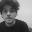

2.0


In [0]:
idx = 600
img = X[idx,:].reshape(32,32)
cv2_imshow(img*255)
print(Y[idx])

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,shuffle=True, random_state=32, test_size=0.2)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(600, 1024)
(600,)
(150, 1024)
(150,)


In [0]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
clf = GridSearchCV(
      SVC(probability=True), tuned_parameters, scoring='f1_macro'
)

In [0]:
clf.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

In [0]:
print(clf.best_estimator_)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [0]:
print(clf.best_score_)

1.0


In [0]:
Y_pred = clf.predict(X_test)
print(Y_pred)

[0. 0. 0. 2. 1. 1. 0. 2. 2. 0. 2. 2. 0. 2. 2. 2. 1. 1. 2. 2. 1. 1. 0. 0.
 2. 0. 0. 0. 0. 0. 1. 1. 1. 0. 2. 0. 2. 0. 2. 2. 1. 2. 2. 0. 2. 0. 2. 2.
 2. 1. 0. 0. 1. 0. 2. 0. 0. 0. 2. 0. 0. 2. 1. 0. 1. 1. 0. 1. 2. 0. 2. 0.
 1. 1. 0. 0. 1. 1. 2. 0. 1. 2. 0. 0. 2. 1. 0. 2. 2. 0. 0. 0. 0. 0. 1. 2.
 0. 0. 0. 1. 0. 2. 1. 0. 2. 1. 2. 1. 0. 1. 1. 2. 1. 2. 1. 0. 2. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 1. 2. 2. 2. 2. 0. 1. 1. 1. 0. 0. 1. 0. 0. 2. 1. 0. 2.
 2. 0. 0. 0. 1. 1.]


In [0]:
Y_pred_proba = clf.predict_proba(X_test)
print(Y_pred_proba)

In [0]:
with open('svm.pkl', 'wb') as handle:
    pickle.dump(clf, handle, protocol=pickle.HIGHEST_PROTOCOL)


Prediction score: [1.]


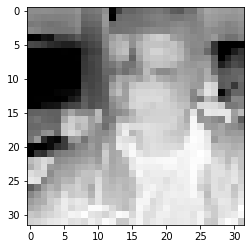

KeyboardInterrupt: ignored

In [0]:
def load_model(inp_name):
    with open(inp_name, 'rb') as f:
        out_clf = pickle.load(f)
        return out_clf

clf = load_model("svm.pkl")

size =  (32,32) #(256,256) 
for i in range(0,X_test.shape[0]):
  test_img = X_test[i]  
  #Y_proba_test = clf.predict_proba([test_img])
  Y_score_test = clf.predict([test_img])
  test_img = test_img.reshape(size)
  clear_output()
  #print("Prediction probability:", Y_proba_test)
  print("Prediction score:", Y_score_test)
  print("Real pred " )
  plt.imshow(test_img, cmap = mpl.cm.binary,interpolation="nearest")
  plt.pause(2)
 